In [16]:
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

import torch
from torch import Tensor
from torch.utils.data import DataLoader

from transformers import RobertaModel, RobertaConfig, RobertaTokenizer
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, AutoModel
#from datasets import load_dataset, load_metric

In [17]:
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base-v2")
model = AutoModelForSequenceClassification.from_pretrained('models/phobert')

model.eval()

/home/bxs/QST/env/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(64001, 768, padding_idx=1)
      (position_embeddings): Embedding(258, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [18]:
def predict(sentence, model, tokenizer, label_map):
    inp = tokenizer(sentence, padding='max_length', max_length=128, truncation=True, return_tensors="pt")
    out = model(**inp)
    probabilities = torch.softmax(out.logits, dim=1).squeeze().detach().cpu().numpy()
    predicted_label = label_map[torch.argmax(out.logits).item()]
    return probabilities, predicted_label

In [19]:
label_map = {
    0: 'positive',
    1: 'negative',
    2: 'neutral'
}

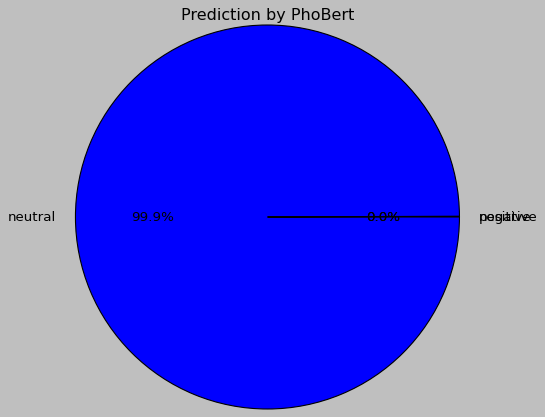

In [23]:
sample = input()
probabilities, predicted_label = predict(sample, model, tokenizer, label_map)
colors = ['#00FF00', '#FF0000', '#0000FF']
percentages = probabilities * 100

plt.pie(percentages, labels=label_map.values(), autopct='%1.1f%%', colors=colors)
plt.axis('equal')
plt.title('Prediction by PhoBert')
plt.show()